In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/vaccination_tweets.csv")
data

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077,1381891596459859969,Prof. Guy Ashton,NaN,Professor of tropical medicine and infectious ...,2020-03-18 07:59:46,238,249,32754,False,2021-04-13 08:46:45,"Off for my second vaccine, then work. 👋💉\n#Cur...","['Cured', 'PfizerBioNTech']",Twitter for Android,0,4,False
8078,1381873083598839816,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,143996,462,197,False,2021-04-13 07:33:11,“When” appears to be a million-dollar question...,NaN,Twitter for iPhone,0,0,False
8079,1381839418055532546,Anisha Sindher,Hong Kong S.A.R,A Wander Woman & a (M)Ad woman: Senior Copywri...,2010-11-30 05:24:01,105,66,2766,False,2021-04-13 05:19:25,Second #PfizerBioNTech vaccine shot done! Than...,"['PfizerBioNTech', 'HongKong', 'HKTwitterGetsV...",Twitter for iPhone,0,4,False
8080,1381824559519723523,Anisha Sindher,Hong Kong S.A.R,A Wander Woman & a (M)Ad woman: Senior Copywri...,2010-11-30 05:24:01,105,66,2766,False,2021-04-13 04:20:22,Second #PfizerBioNTech vaccine is officially i...,"['PfizerBioNTech', 'HongKong', 'HK']",Twitter for iPhone,0,3,False


In [2]:
data.isnull().sum()

id                     0
user_name              0
user_location       1630
user_description     506
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [3]:
data.dropna(inplace = True)

In [5]:
data.shape

(4749, 16)

In [9]:
import nltk
import re
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def clean(text):
    text = str(text).lower()
    text = re.sub("\[.*?\]", "", text)
    text = re.sub("https?://\S+|www\.\S+", "", text)
    text = re.sub("<.*?>","", text)
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    text = re.sub("\n","",text)
    text = re.sub("\w*\d\w","",text)
    text = [word for word in text.split(" ") if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(" ")]
    text = " ".join(text)
    return text
data["text"] = data["text"].apply(clean)

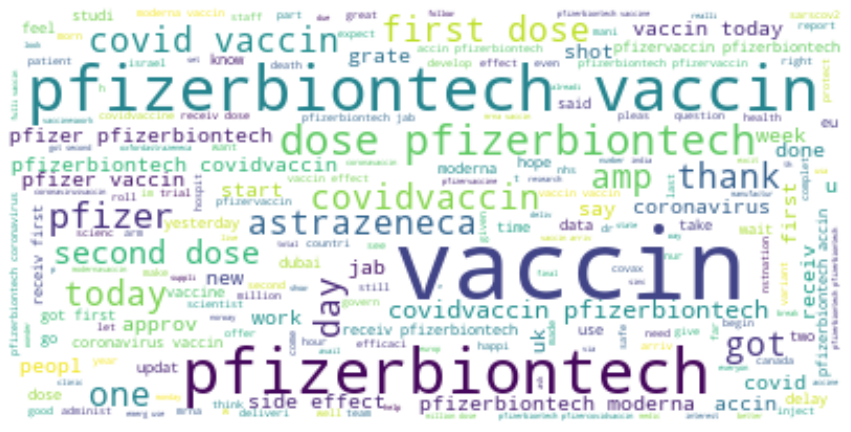

In [14]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

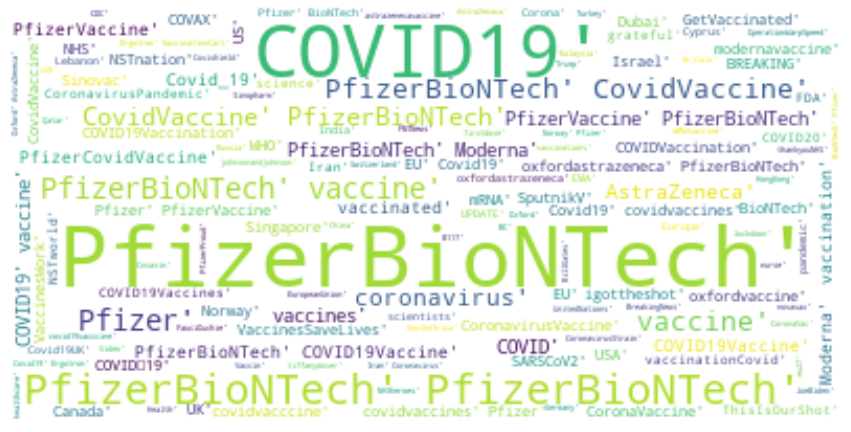

In [15]:
text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [16]:
data.user_verified.value_counts()

False    4169
True      580
Name: user_verified, dtype: int64

In [17]:
nltk.download("vader_lexicon")
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
data

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,Positive,Negative,Neutral
0,folk said daikon past could treat cytokin stor...,0.252,0.000,0.748
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000,0.000,1.000
6,bit sad claim fame success vaccin patriot comp...,0.353,0.166,0.481
9,covidvaccin state start get accin monday us sa...,0.000,0.000,1.000
10,death close mark million peopl wait pfizerbio...,0.000,0.302,0.698
...,...,...,...,...
8073,h setsirwud foreign vaccin entri enrich aatman...,0.252,0.000,0.748
8074,ew shereenbhan wtf play ping pong game khelaho...,0.158,0.250,0.592
8079,second pfizerbiontech vaccin shot done thank h...,0.238,0.000,0.762
8080,second pfizerbiontech vaccin offici 💉thank hon...,0.000,0.000,1.000


In [18]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive :)")
    elif (b>a) and (b>c):
        print("Negative :(")
    else:
        print("Neutral :|")
sentiment_score(x, y, z)

Neutral :|


In [19]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  413.0329999999999
Negative:  186.6040000000003
Neutral:  4149.367000000007
